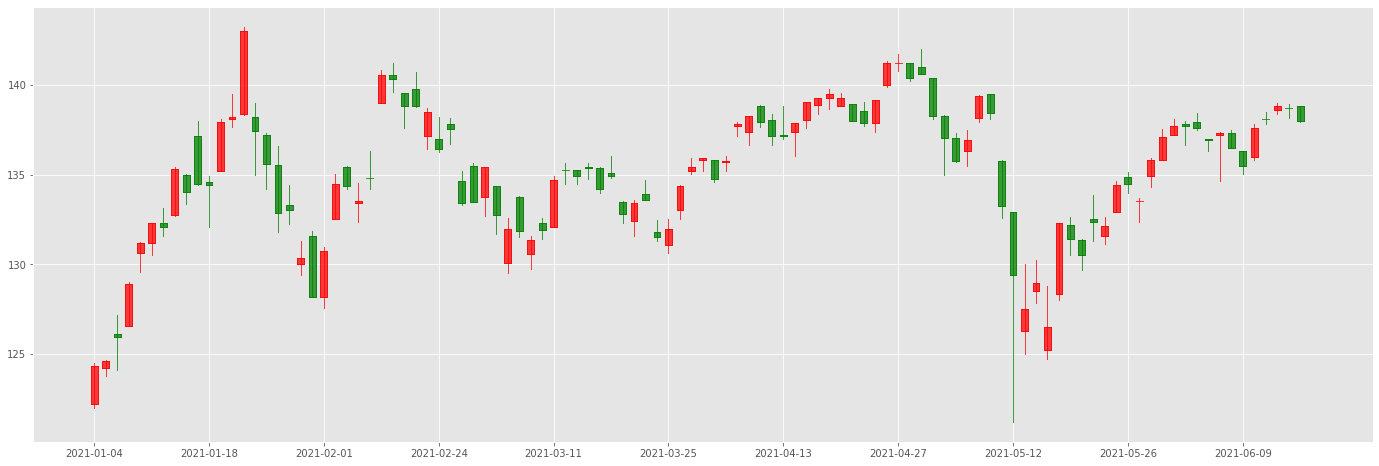

In [20]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

#talib
import talib
start = datetime.datetime(2021,1,1)
df_stock = pdr.DataReader('0050.TW', 'yahoo', start=start)
df_stock.index = df_stock.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))
plt.style.use('ggplot')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_stock.index), 10))
ax.set_xticklabels(df_stock.index[::10])
mpf.candlestick2_ochl(ax, df_stock['Open'], df_stock['Close'], df_stock['High'],
                      df_stock['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0, flags=flags)


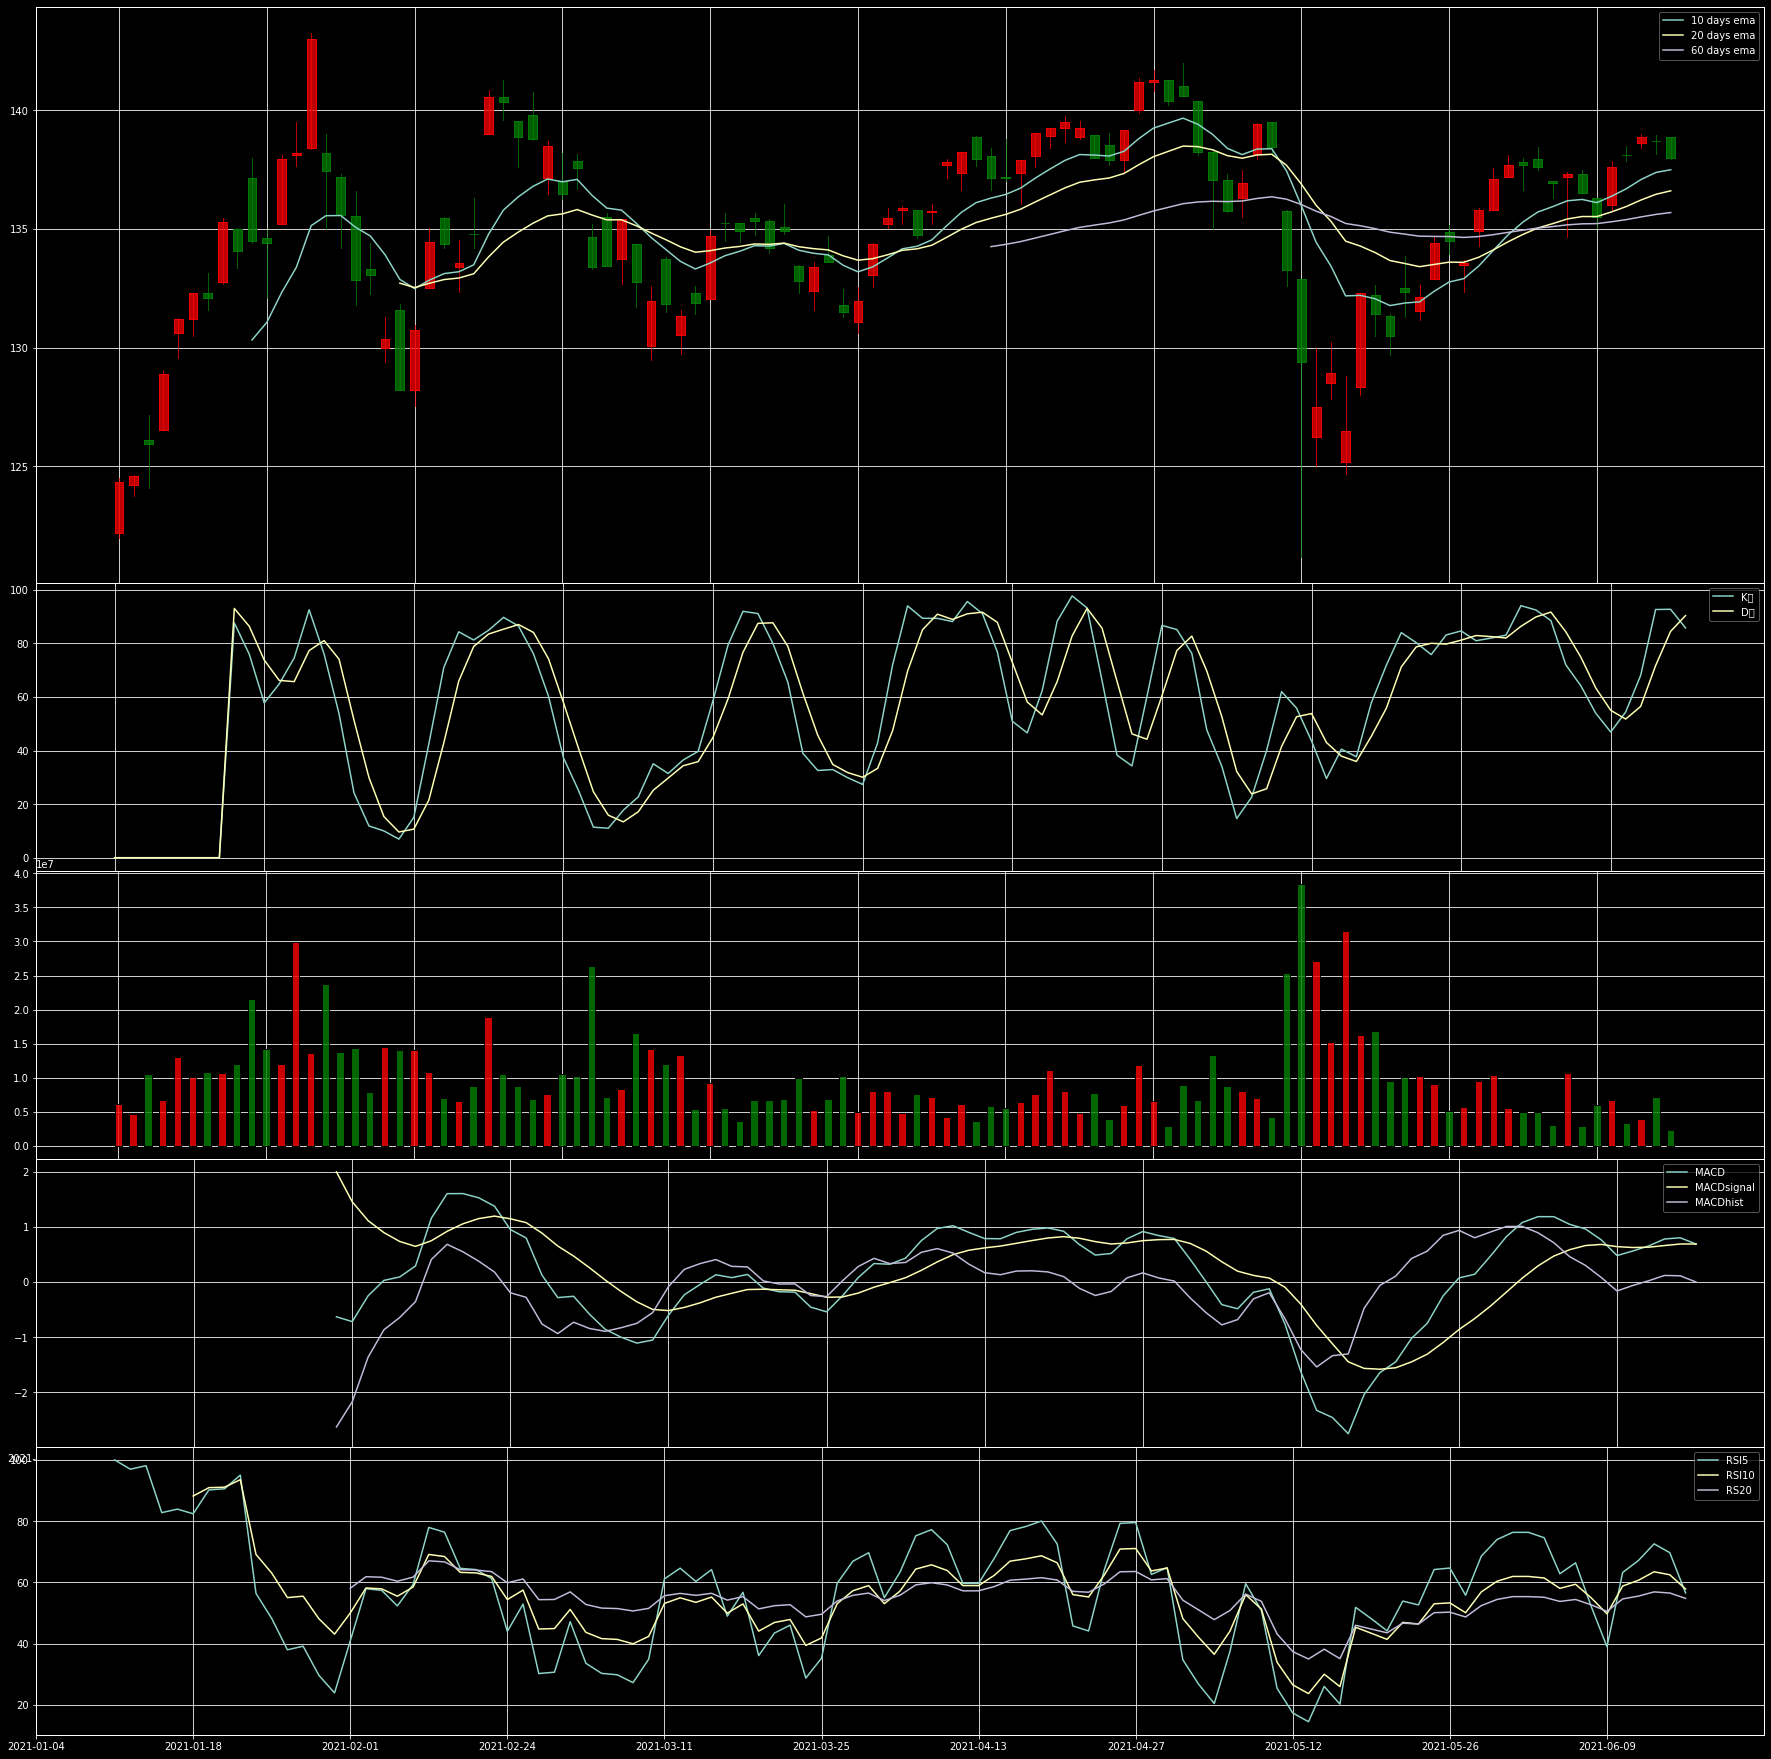

In [22]:
#ema
ema_10 = talib.EMA(np.array(df_stock['Close']), 10)
ema_20 = talib.EMA(np.array(df_stock['Close']), 20)
ema_60 = talib.EMA(np.array(df_stock['Close']), 60)
ema_120 = talib.EMA(np.array(df_stock['Close']), 120)

#kd
df_stock['k'],df_stock['d']=talib.STOCH(df_stock['High'],df_stock['Low'],df_stock['Close'])
df_stock['k'].fillna(value=0,inplace=True)
df_stock['d'].fillna(value=0,inplace=True)

#MACD
df_stock['MACD'],df_stock['MACDsignal'],df_stock['MACDhist']=talib.MACD(df_stock['Close'],fastperiod=6, slowperiod=12, signalperiod=9)

#rsi
df_stock['RSI5']=talib.RSI(df_stock['Close'],timeperiod=5)
df_stock['RSI10']=talib.RSI(df_stock['Close'],timeperiod=10)
df_stock['RSI20']=talib.RSI(df_stock['Close'],timeperiod=20)

fig = plt.figure(figsize=(24, 20))
plt.style.use('dark_background')
ax = fig.add_axes([0,0.8,1,0.4])
ax2 = fig.add_axes([0,0.6,1,0.2])
ax3 = fig.add_axes([0,0.4,1,0.2])
ax4 = fig.add_axes([0,0.2,1,0.2])
ax5 = fig.add_axes([0,0,1,0.2])

#k線
ax.set_xticks(range(0, len(df_stock.index), 10))
ax.set_xticklabels(df_stock.index[::10])
mpf.candlestick2_ochl(ax, df_stock['Open'], df_stock['Close'], df_stock['High'],df_stock['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

ax.plot(ema_10, label='10 days ema')
ax.plot(ema_20, label='20 days ema')
ax.plot(ema_60, label='60 days ema')

ax2.plot(df_stock['k'], label='K值')
ax2.plot(df_stock['d'], label='D值')
ax2.set_xticks(range(0, len(df_stock.index), 10))
ax2.set_xticklabels(df_stock.index[::10])

mpf.volume_overlay(ax3, df_stock['Open'], df_stock['Close'], df_stock['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_stock.index), 10))
ax3.set_xticklabels(df_stock.index[::10])

ax4.plot(df_stock['MACD'],label="MACD")
ax4.plot(df_stock['MACDsignal'],label="MACDsignal")
ax4.plot(df_stock['MACDhist'],label="MACDhist")
ax4.set_xticks(range(0, len(df_stock.index), 10))
ax4.set_xticklabels(df_stock.index[::10])

ax5.plot(df_stock['RSI5'],label="RSI5")
ax5.plot(df_stock['RSI10'],label="RSI10")
ax5.plot(df_stock['RSI20'],label="RS20")
ax5.set_xticks(range(0, len(df_stock.index), 10))
ax5.set_xticklabels(df_stock.index[::10])
ax5.xaxis.label.set_color('white')

ax.legend()
ax2.legend()
ax4.legend()
ax5.legend()


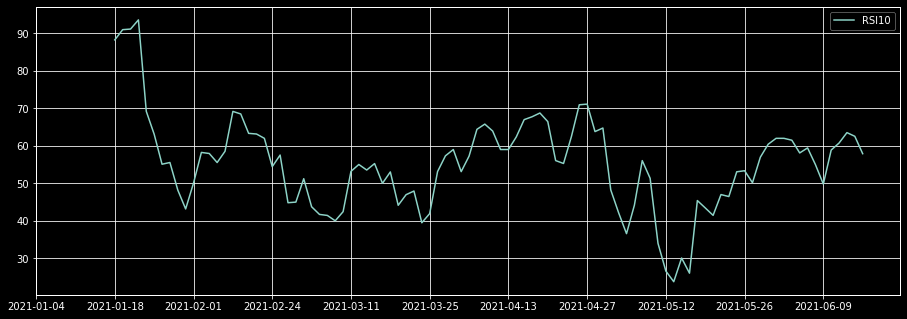

In [23]:
df_stock['RSI10']=talib.RSI(df_stock['Close'],timeperiod=10)
fig = plt.figure(figsize=(24, 20))
plt.style.use('dark_background')
ax5 = fig.add_axes([0,0,0.5,0.2])
ax5.plot(df_stock['RSI10'],label="RSI10")
ax5.set_xticks(range(0, len(df_stock.index), 10))
ax5.set_xticklabels(df_stock.index[::10])
ax5.xaxis.label.set_color('white')
ax5.legend()
plt.savefig('rsi_example')